# Diamonds TRAIN analysis & cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diamonds_train = pd.read_csv('input/diamonds_train.csv', encoding='latin-1')

## Diamonds_train analysis and cleaning

In [3]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [4]:
diamonds_train.shape

(40455, 11)

In [5]:
# No hay valores nulos

diamonds_train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
diamonds_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
# Estudio las columnas con valores "object"
# Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

diamonds_train["cut"].value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [8]:
# Diamond colour, from J (worst) to D (best)

diamonds_train["color"].value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [9]:
# Clarity: a measurement of how clear the diamond is 
# I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

diamonds_train["clarity"].value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

## Numerical data

In [10]:
diamonds_train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798121,61.745132,57.451892,5.731217,5.735248,3.538685,3938.101125
std,11678.496907,0.474880,1.434259,2.225893,1.123364,1.152859,0.710579,3992.645108
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,2401.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5333.000000
max,40454.000000,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18818.000000


El valor mínimo de x (largo), y (ancho) & z (profundidad) es cero.
Esto no tiene sentido, así que prescindo de esas líneas.

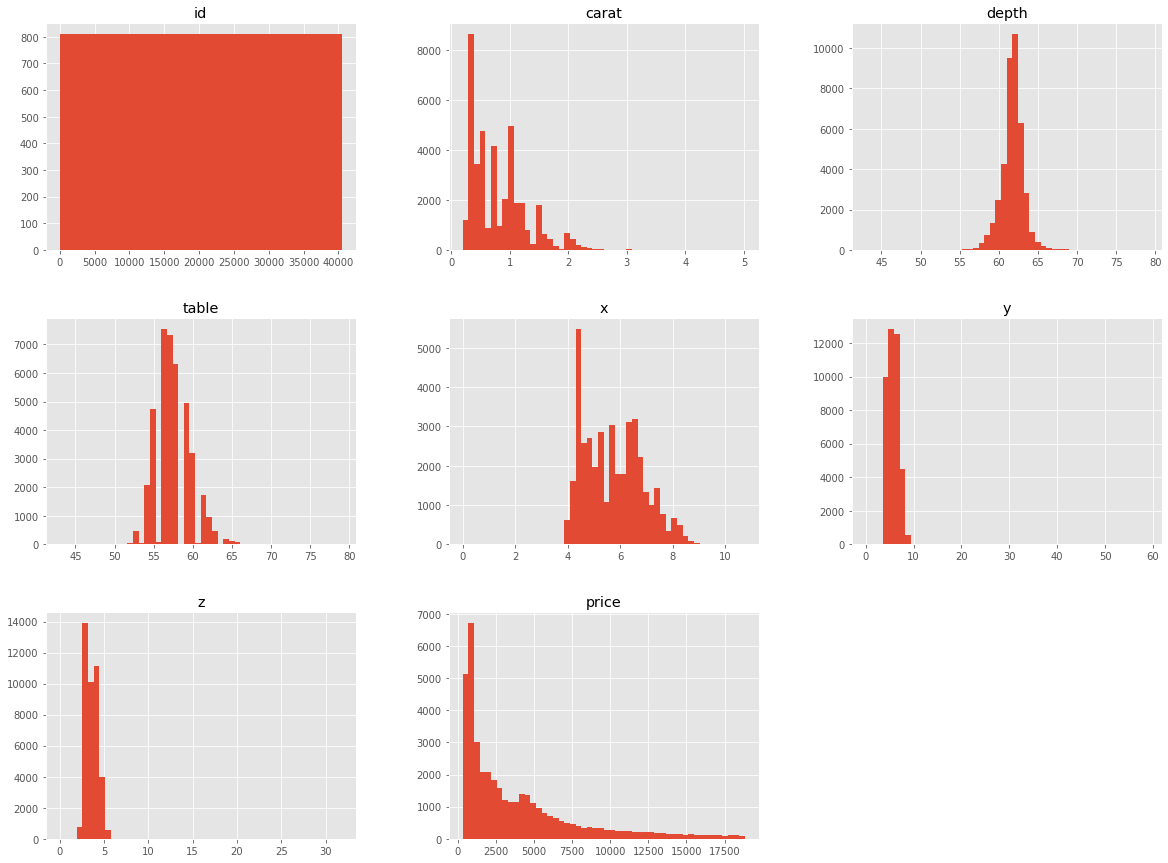

In [11]:
# Muestra de las distribuciones de atributos numéricos utilizando el método hist

diamonds_train.hist(bins=50,figsize=(20,15))
plt.show()

El diagrama de pares nos permite ver tanto la distribución de variables como las relaciones entre dos variables

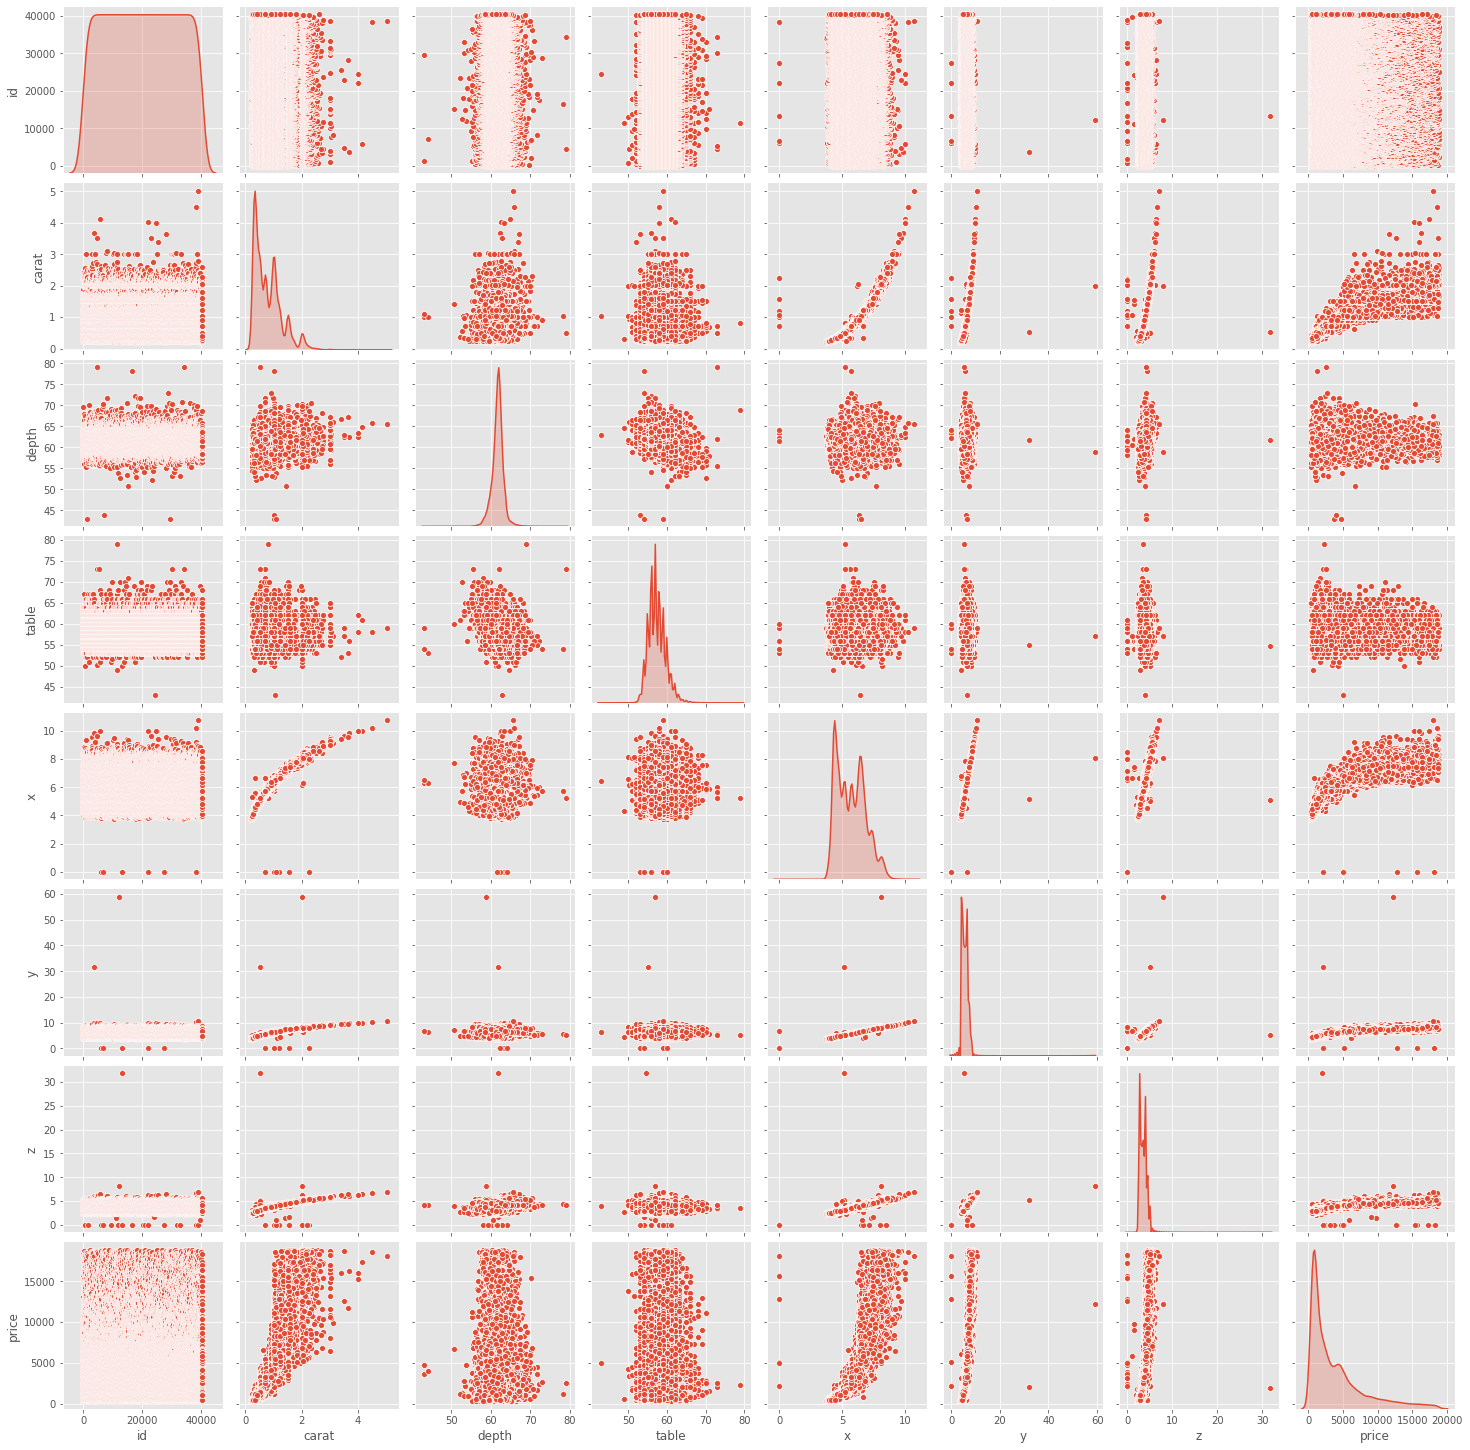

In [12]:
# Las variables x, y & z tienen buena correlación respecto al precio de la variable dependiente.

sb.pairplot(diamonds_train , diag_kind = 'kde');

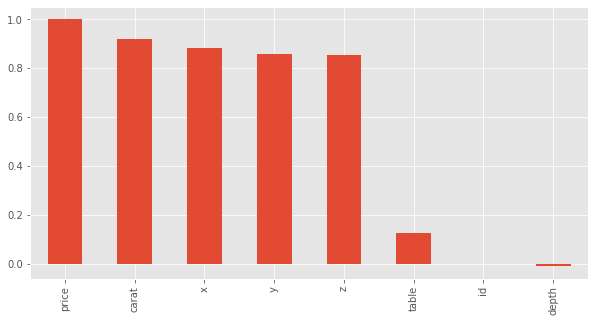

In [13]:
# Cuantificación de la correlación con .corr ()

corr_mat = diamonds_train.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

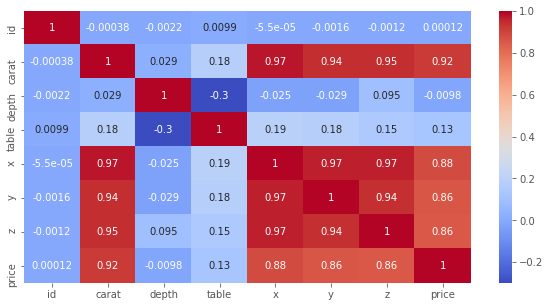

In [24]:
# Visualización de la correlación

plt.figure(figsize = (10,5))
sb.heatmap(diamonds_train.corr(),annot = True , cmap = 'coolwarm' );

Carat, x, y & z tienen una fuerte correlación con el precio. 
Podemos prescindir de la característica "depth" porque apenas tiene relación con el precio.

## Categorical data

<AxesSubplot:xlabel='cut', ylabel='price'>

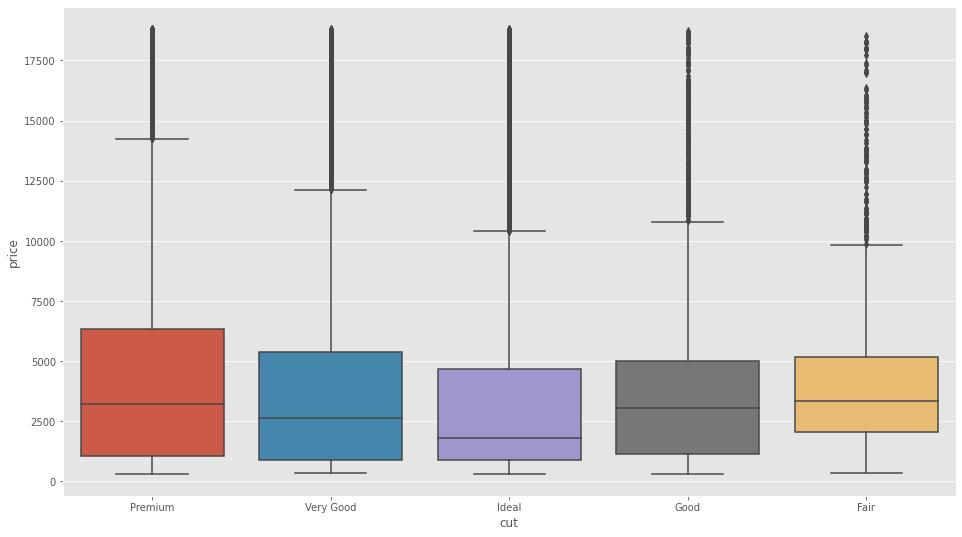

In [15]:
# Precio en relación al corte

sb.boxplot(x = diamonds_train.cut, y = diamonds_train.price)

<AxesSubplot:xlabel='color', ylabel='price'>

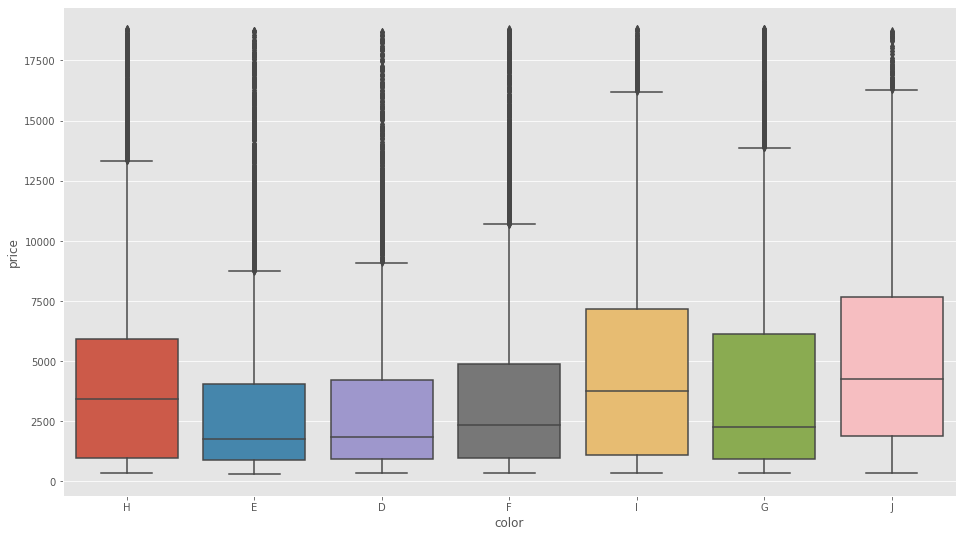

In [16]:
# Precio en relación al color

sb.boxplot(x = diamonds_train.color, y = diamonds_train.price)

<AxesSubplot:xlabel='clarity', ylabel='price'>

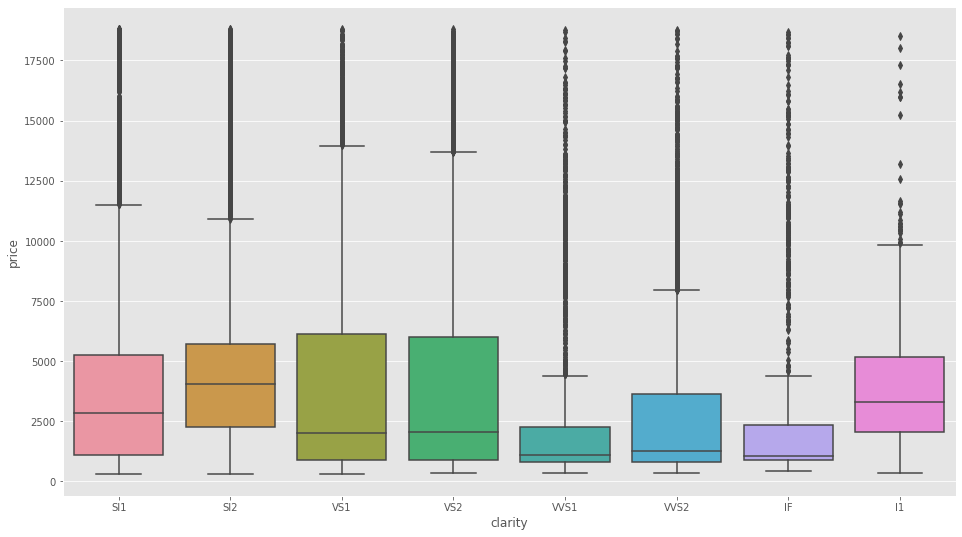

In [17]:
# Precio en relación a la claridad

sb.boxplot(x = diamonds_train.clarity, y = diamonds_train.price)

In [18]:
# Convertimos los datos categóricos en numéricos

In [19]:
diamonds_train_dummies = pd.get_dummies(diamonds_train)
diamonds_train_dummies.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.12,61.6,59.0,6.67,6.63,4.10,5363,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.14,60.0,54.0,6.74,6.97,4.11,5593,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.90,60.3,63.0,6.12,6.22,3.72,3534,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.71,61.9,54.0,5.74,5.76,3.56,3212,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.34,60.0,62.0,4.51,4.55,2.72,447,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#Elimino la columna del id pq no aporta infomación en este caso

diamonds_train_dummies.drop(columns = 'id', axis = 1, inplace = True )
diamonds_train_dummies.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.12,61.6,59.0,6.67,6.63,4.10,5363,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.14,60.0,54.0,6.74,6.97,4.11,5593,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.90,60.3,63.0,6.12,6.22,3.72,3534,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.71,61.9,54.0,5.74,5.76,3.56,3212,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.34,60.0,62.0,4.51,4.55,2.72,447,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
diamonds_train_dummies.to_csv("output/diamonds_train_dummies.csv",index=False)